1.	Import the required libraries (Already done for you). 

In [25]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split


2.	Import the heart disease from the Google Drive.

In [26]:
data = pd.read_csv('/content/heart.csv')


3.	Display the top 5 rows from the loaded datasets. 


In [27]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


4.	Print the shape of the dataset and explain the output. 

In [28]:
shape = data.shape
shape

(303, 14)

The shape explains (rows,columns) of the data, here we have 303 rows and 14 columns.

5.	Describe the dataset using describe() function.

In [29]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


6.	Check for the null values isnull().sum() function. Why do we use sum() function after isnull(). Write the justification in the notebook. 

In [30]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

The function dataframe. isnull(). sum(). sum() returns the number of missing values in the data set. If we only give isnull() function then it is going to return a boolean value of it having null value or not, but with sum() funtion, the total null vaules in each column is being calculated.

7.	Separate the features and target variables. Hint: Use iloc() function from the pandas library. 

In [31]:
X = data.iloc[:,:13].values
y = data["target"].values


8.	Split the dataset into train and test sets. Hint: use train_test_split() function from the Sklearn library. Use 80% as the train set and 20% as the test set. 

In [32]:
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size = 0.2 , random_state = 0 )


9.	Now, design the ANN network architecture using the     following layers:
  a.	First Hidden Layers: 8 neurons
  b.	Second Hidden Layers: 12 neurons
  c.	Third Hidden Layers: 14 neurons
  d.	Output Layers: ? (You need to decide)


In [33]:
#scaling the model for better results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [41]:

classifier = Sequential()
classifier.add(Dense(activation = "relu", input_dim = 13,
					units = 8, kernel_initializer = "uniform"))
classifier.add(Dense(activation = "relu", units = 12,
					kernel_initializer = "uniform"))
classifier.add(Dense(activation = "sigmoid", units = 14,
					kernel_initializer = "uniform"))
classifier.add(Dense(activation = "sigmoid", units = 1,
					kernel_initializer = "uniform"))




10.	Once the model is created, we use the compile method to pass the additional parameters that are needed for training such as optimizer = 'adam',  loss = 'binary_crossentropy', metrics = ['accuracy']

In [42]:
classifier.compile(optimizer = 'adam' , loss = 'binary_crossentropy',
				metrics = ['accuracy'] )

11.	The model is now ready to be trained. However, it is a good idea to check the configuration of the model by using the summary function:

In [43]:
classifier.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 8)                 112       
                                                                 
 dense_16 (Dense)            (None, 12)                108       
                                                                 
 dense_17 (Dense)            (None, 14)                182       
                                                                 
 dense_18 (Dense)            (None, 1)                 15        
                                                                 
Total params: 417
Trainable params: 417
Non-trainable params: 0
_________________________________________________________________


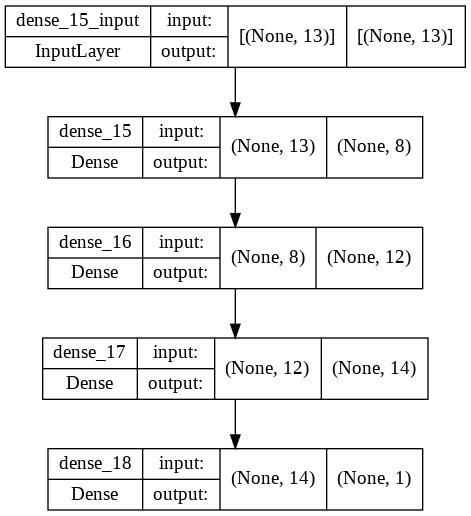

In [44]:
from keras.utils.vis_utils import plot_model
plot_model(classifier, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

12.	Train the model by calling the fit() method. Train the model for 100 epochs with batch size 8. 

In [45]:
classifier.fit(X_train , y_train , batch_size = 8 ,epochs = 100 )



Epoch 1/100
31/31 [==============================] - 1s 1ms/step - loss: 0.6915 - accuracy: 0.5413
Epoch 2/100
31/31 [==============================] - 0s 1ms/step - loss: 0.6900 - accuracy: 0.5413
Epoch 3/100
31/31 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5413
Epoch 4/100
31/31 [==============================] - 0s 2ms/step - loss: 0.6836 - accuracy: 0.5413
Epoch 5/100
31/31 [==============================] - 0s 1ms/step - loss: 0.6703 - accuracy: 0.5413
Epoch 6/100
31/31 [==============================] - 0s 1ms/step - loss: 0.6441 - accuracy: 0.5413
Epoch 7/100
31/31 [==============================] - 0s 1ms/step - loss: 0.6050 - accuracy: 0.6736
Epoch 8/100
31/31 [==============================] - 0s 1ms/step - loss: 0.5569 - accuracy: 0.8347
Epoch 9/100
31/31 [==============================] - 0s 2ms/step - loss: 0.5149 - accuracy: 0.8347
Epoch 10/100
31/31 [==============================] - 0s 1ms/step - loss: 0.4818 - accuracy: 0.8347
Epoch 11/

13.	Evaluate the model on test data. Prediction above 0.5 (50%) will be consider as the heart disease patient. 

In [46]:
# convert into boolean classification problem - heart disease or no heart disease

Y_test_bool = y_test.copy()
for i in Y_test_bool:
  if i == 1:
    print(True)
  else:
    print(False)



False
True
False
False
True
False
False
False
False
False
True
True
False
True
True
True
True
True
False
True
True
False
False
False
True
False
False
False
True
True
False
False
True
True
True
False
False
True
False
False
True
True
True
False
True
True
True
False
False
True
True
True
True
True
True
False
True
False
True
True
True
